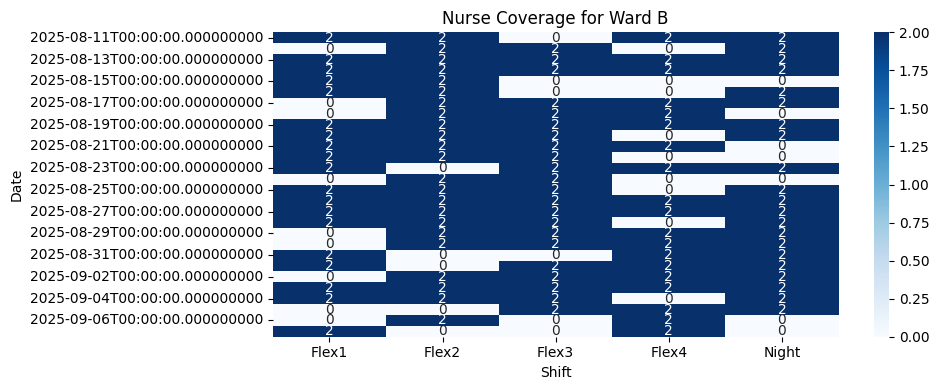

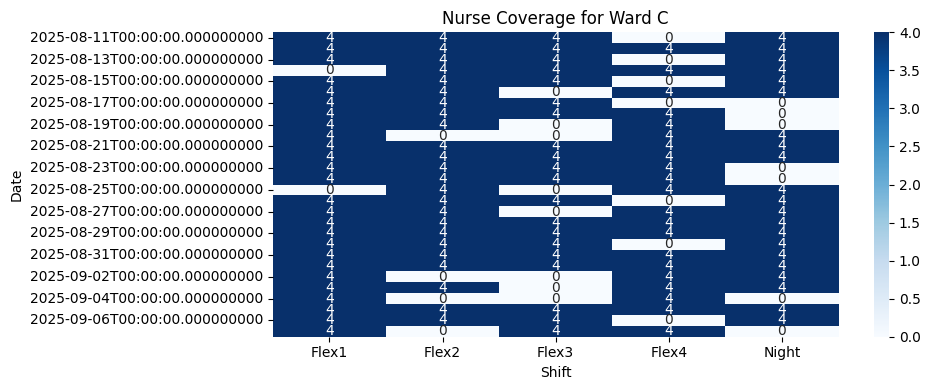

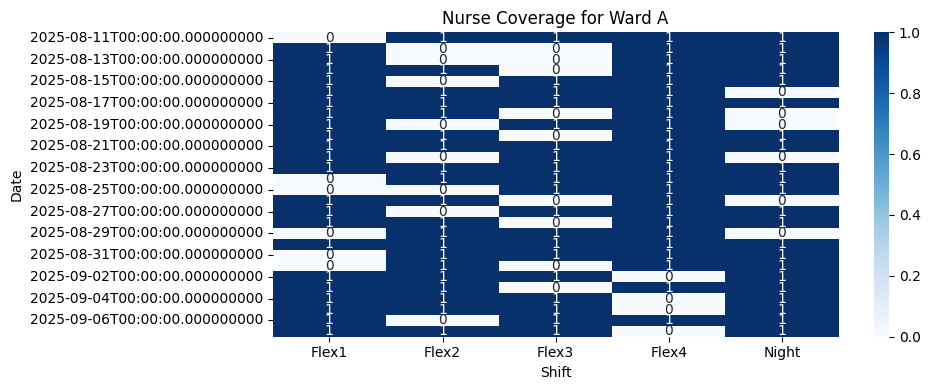

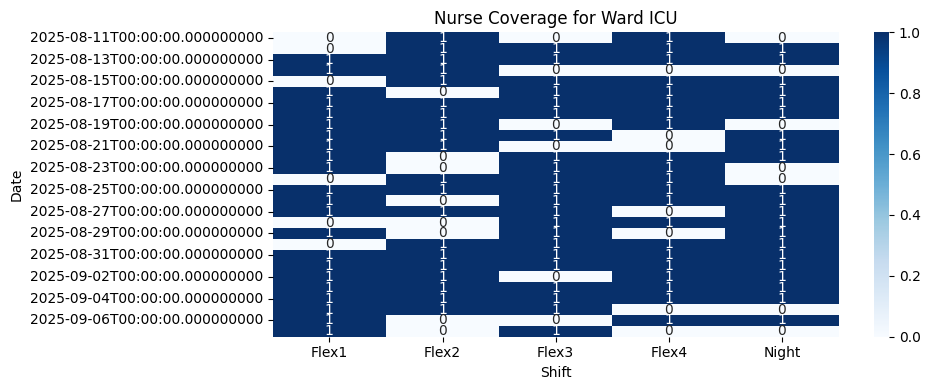

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the assignment output
df = pd.read_csv("C:\\Users\\Alex\\nurse\\data\\assignment_ui_output.csv")
df['date'] = pd.to_datetime(df['date'])

# Group: Number of nurses per ward, per shift, per date
ward_shift_coverage = df.groupby(['date', 'shift', 'ward']).size().reset_index(name='nurse_count')

# Pivot for heatmap: Example for a single ward
for ward in ward_shift_coverage['ward'].unique():
    pivot = ward_shift_coverage[ward_shift_coverage['ward'] == ward].pivot(
        index='date', columns='shift', values='nurse_count'
    ).fillna(0)
    plt.figure(figsize=(10, 4))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
    plt.title(f'Nurse Coverage for Ward {ward}')
    plt.ylabel('Date')
    plt.xlabel('Shift')
    plt.tight_layout()
    plt.show()


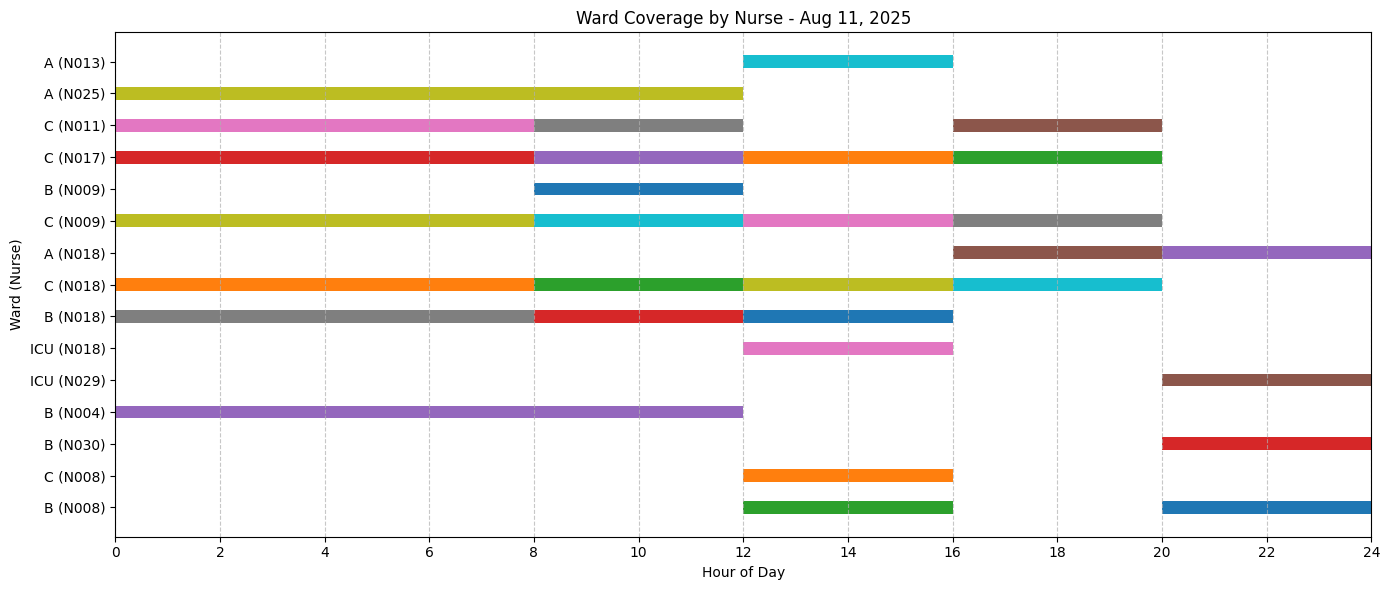

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("C:\\Users\\Alex\\nurse\\data\\assignment_ui_output.csv")  # Adjust path if needed

# Convert date and time columns
df['start_time'] = pd.to_timedelta(df['start_time'])
df['end_time'] = pd.to_timedelta(df['end_time'])
df['date'] = pd.to_datetime(df['date'])

# Select only the first date
first_date = df['date'].min().date()
df_day = df[df['date'].dt.date == first_date]

# Plot for one day
plt.figure(figsize=(14, 6))
for _, row in df_day.iterrows():
    plt.barh(
        y=f"{row['ward']} ({row['nurse_id']})",
        width=(row['end_time'] - row['start_time']).total_seconds() / 3600,
        left=row['start_time'].total_seconds() / 3600,
        height=0.4,
    )

plt.title(f"Ward Coverage by Nurse - {first_date.strftime('%b %d, %Y')}")
plt.xlabel("Hour of Day")
plt.ylabel("Ward (Nurse)")
plt.xlim(0, 24)
plt.xticks(range(0, 25, 2))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
